In [7]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt 

In [3]:
# Read data
mnist = input_data.read_data_sets("MNIST/", one_hot=True)

W0118 15:47:22.708100 4659615168 deprecation.py:323] From <ipython-input-3-a1b446346805>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0118 15:47:22.710296 4659615168 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0118 15:47:22.714713 4659615168 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future ve

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0118 15:47:25.060866 4659615168 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0118 15:47:25.064831 4659615168 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0118 15:47:26.221678 4659615168 deprecation.py:323] From /usr/local/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
#Define the various Deep Learning parameters as well as the image and label size
#image_size = 28 refers to the pixel dimensions and num_labels = 10 refers to the number of digits(0-9)

image_size = 28
num_labels = 10
learning_rate = 0.05
number_of_steps = 1000
batch_size = 100

In [5]:
# Define placeholders
x_train = tf.placeholder(tf.float32, [None, image_size*image_size])
y_train = tf.placeholder(tf.float32, [None, num_labels])

In [21]:
print("Number of training examples:", mnist.train.num_examples)
print("Number of validation examples:", mnist.validation.num_examples)
print("Number of testing examples:", mnist.test.num_examples)

Number of training examples: 55000
Number of validation examples: 5000
Number of testing examples: 10000


In [22]:
print(mnist.train.images.shape, mnist.train.labels.shape)
print(mnist.validation.images.shape, mnist.validation.labels.shape)
print(mnist.test.images.shape, mnist.test.labels.shape)

(55000, 784) (55000, 10)
(5000, 784) (5000, 10)
(10000, 784) (10000, 10)


In [6]:
print(x_train)

Tensor("Placeholder:0", shape=(?, 784), dtype=float32)


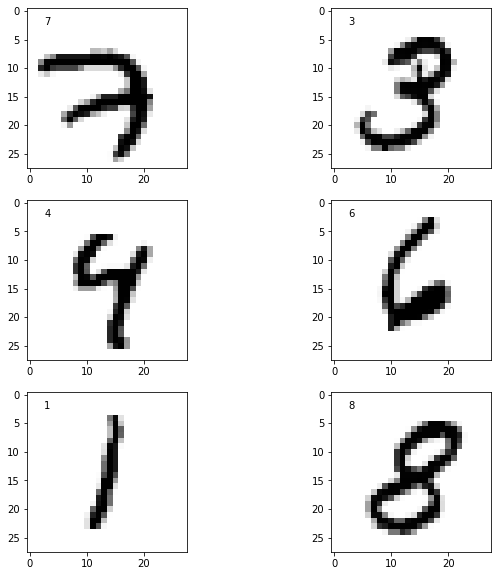

In [10]:
left= 2.5
top = 2.5

fig = plt.figure(figsize=(10,10))

for i in range(6):
    ax = fig.add_subplot(3,2,i+1)
    im = np.reshape(mnist.train.images[i,:], [28,28])

    label = np.argmax(mnist.train.labels[i,:])
    ax.imshow(im, cmap='Greys')
    ax.text(left, top, str(label))

In [15]:
# A placeholder for the data (inputs and outputs)
inputs = tf.placeholder(tf.float32, [None, 784])

# Weights: the weights for each pixel for each class
# bias: bias of each class
Weights = tf.Variable(tf.zeros([784, 10]))
bias = tf.Variable(tf.zeros([10]))

In [16]:
# The model
outputs = tf.nn.softmax(tf.matmul(inputs, Weights) + bias)

In [17]:
# placeholder to input correct answers
y_ = tf.placeholder(tf.float32, [None, 10])

# A measure of model precision using cross-entropy
cross_entropy = tf.reduce_mean(-tf.reduce_sum(y_ * tf.log(outputs), reduction_indices=[1]))

In [18]:
# ask TensorFLow to minimize cross_entropy with gradient descent
# with 0.5 as learning rate
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

In [19]:
init = tf.global_variables_initializer()

# the execution
sess = tf.Session()
sess.run(init)

# run training step 1000 times
for i in range(1000):
    
    # get random 100 data samples from the training set
    batch_xs, batch_ys = mnist.train.next_batch(100)
    
    # feed them to the model in place of the placeholders defined above
    sess.run(train_step, feed_dict={inputs: batch_xs, y_: batch_ys})

In [20]:
correct_prediction = tf.equal(tf.argmax(outputs,1), tf.argmax(y_,1))

#this accuracy returns the mean value of an array of 1s and 0s.
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# retrun the accuracy on the test set.
print("Accuracy: ", sess.run(accuracy, feed_dict={inputs: mnist.test.images, y_: mnist.test.labels}))

Accuracy:  0.9182
